# üñºÔ∏è Actividad Guiada: Clasificaci√≥n de Im√°genes con MobileNet

**Objetivo:** Aprender a usar modelos preentrenados para clasificar im√°genes usando TensorFlow y Keras.

**Modelo:** MobileNetV2 - Una red neuronal convolucional ligera y eficiente.

**Dataset de entrenamiento:** ImageNet (1000 categor√≠as)

---

## üìö Parte 1: Instalaci√≥n y Configuraci√≥n

In [11]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

print(f"TensorFlow versi√≥n: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

TensorFlow versi√≥n: 2.19.0
GPU disponible: []


## üß† Parte 2: Cargar el Modelo Preentrenado

MobileNetV2 es una arquitectura eficiente dise√±ada para dispositivos m√≥viles.
Est√° preentrenada con ImageNet (14 millones de im√°genes, 1000 categor√≠as).

In [12]:
print("üîÑ Cargando modelo MobileNetV2...")
model = MobileNetV2(weights='imagenet', include_top=True)
print("‚úÖ Modelo cargado exitosamente!")

# Mostrar resumen del modelo
print("\nüìä Arquitectura del modelo:")
model.summary()

üîÑ Cargando modelo MobileNetV2...
‚úÖ Modelo cargado exitosamente!

üìä Arquitectura del modelo:


Model: "mobilenetv2_1.00_224"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1       ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1 (Conv2D)      ‚îÇ (None, 112, 112,  ‚îÇ        864 ‚îÇ input_layer_1[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bn_Conv1            ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ Conv1[0][0]       ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1_relu (ReLU)   ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ bn_Conv1[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        288 ‚îÇ Conv1_relu[0][0]  ‚îÇ
‚îÇ (DepthwiseConv2D)   ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (ReLU)              ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        512 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ         64 ‚îÇ expanded_conv_pr‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

## üñºÔ∏è Parte 3: Funciones Auxiliares

Creamos funciones para:
1. Cargar im√°genes desde URL o archivo local
2. Preprocesar im√°genes para el modelo
3. Visualizar resultados

In [13]:
def cargar_imagen_desde_url(url):
    """Carga una imagen desde una URL"""
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"‚ùå Error al cargar imagen: {e}")
        return None

def preprocesar_imagen(img, target_size=(224, 224)):
    """
    Preprocesa la imagen para MobileNetV2
    - Redimensiona a 224x224
    - Convierte a array numpy
    - Aplica preprocesamiento espec√≠fico de MobileNet
    """
    # Redimensionar
    img = img.resize(target_size)

    # Convertir a array numpy
    img_array = image.img_to_array(img)

    # Expandir dimensiones (batch size)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocesamiento espec√≠fico de MobileNet
    img_array = preprocess_input(img_array)

    return img_array

def clasificar_y_mostrar(img, predicciones, top_k=5):
    """
    Muestra la imagen y las predicciones del modelo
    """
    # Decodificar predicciones
    resultados = decode_predictions(predicciones, top=top_k)[0]

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Mostrar imagen
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title('Imagen Original', fontsize=14, fontweight='bold')

    # Mostrar predicciones
    clases = [resultado[1] for resultado in resultados]
    probabilidades = [resultado[2] * 100 for resultado in resultados]

    # Crear gr√°fico de barras
    colores = plt.cm.viridis(np.linspace(0.3, 0.9, top_k))
    bars = ax2.barh(clases, probabilidades, color=colores)
    ax2.set_xlabel('Probabilidad (%)', fontsize=12)
    ax2.set_title(f'Top {top_k} Predicciones', fontsize=14, fontweight='bold')
    ax2.invert_yaxis()

    # A√±adir valores en las barras
    for i, (bar, prob) in enumerate(zip(bars, probabilidades)):
        ax2.text(prob + 1, i, f'{prob:.2f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Mostrar resultados en texto
    print("\n" + "="*60)
    print("üéØ RESULTADOS DE CLASIFICACI√ìN")
    print("="*60)
    for i, (id_clase, nombre, probabilidad) in enumerate(resultados, 1):
        print(f"{i}. {nombre.replace('_', ' ').title()}: {probabilidad*100:.2f}%")
    print("="*60 + "\n")

## üöÄ Parte 4: Ejemplos de Clasificaci√≥n

Vamos a clasificar diferentes tipos de im√°genes.

üêï Ejemplo 1: Clasificando un Golden Retriever


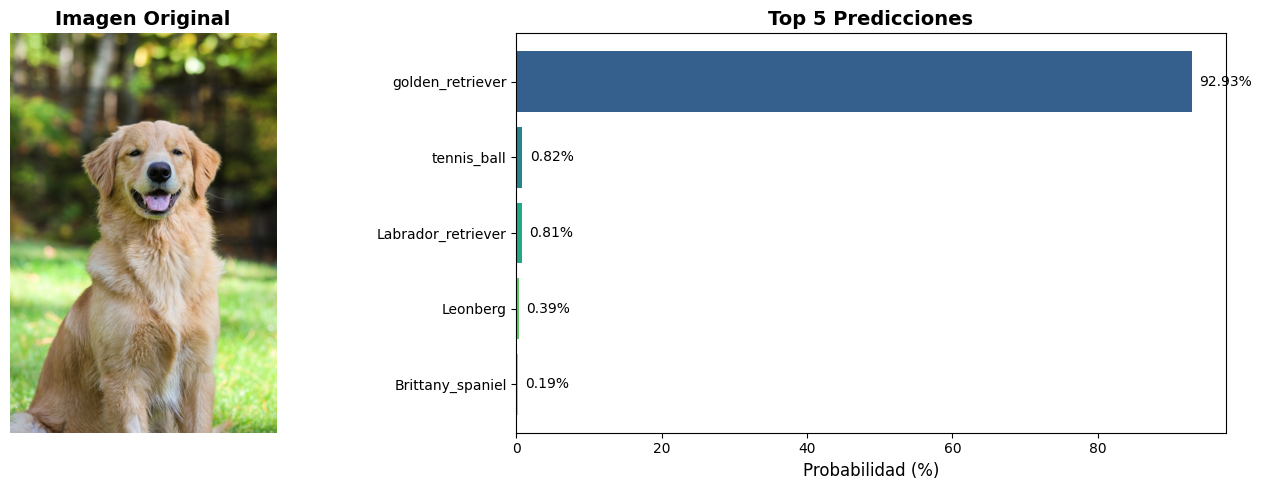


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Golden Retriever: 92.93%
2. Tennis Ball: 0.82%
3. Labrador Retriever: 0.81%
4. Leonberg: 0.39%
5. Brittany Spaniel: 0.19%



In [14]:
print("üêï Ejemplo 1: Clasificando un Golden Retriever")
url_perro = "https://images.unsplash.com/photo-1633722715463-d30f4f325e24?w=500"

img_perro = cargar_imagen_desde_url(url_perro)
if img_perro:
    img_procesada = preprocesar_imagen(img_perro)
    predicciones = model.predict(img_procesada, verbose=0)
    clasificar_y_mostrar(img_perro, predicciones)

### üìù Ejercicio 1: Prueba con tus propias im√°genes

Cambia la URL por una imagen de tu elecci√≥n y ejecuta el c√≥digo.

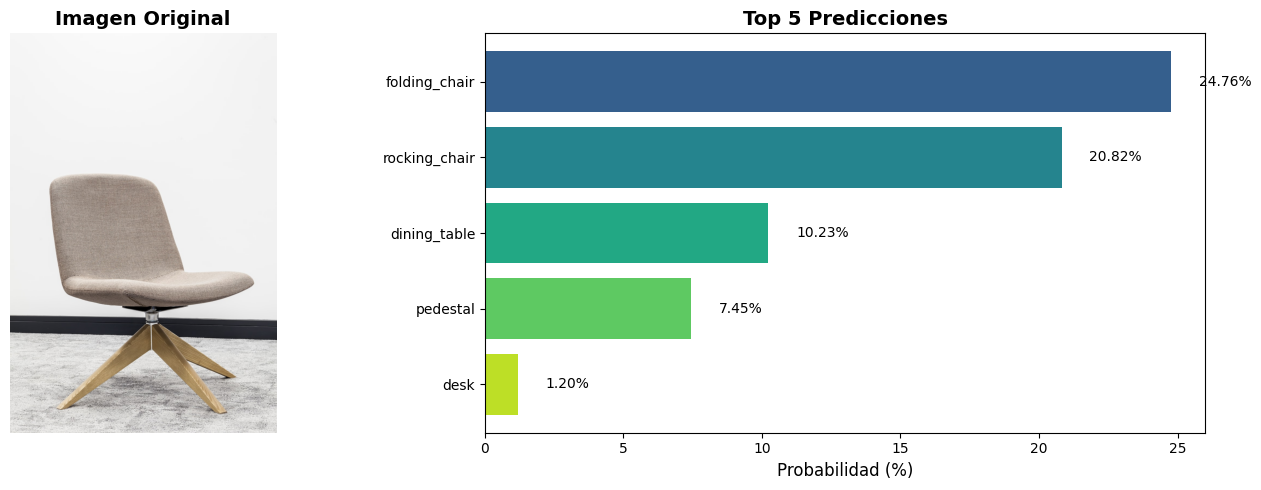


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Folding Chair: 24.76%
2. Rocking Chair: 20.82%
3. Dining Table: 10.23%
4. Pedestal: 7.45%
5. Desk: 1.20%



In [15]:
#  AQUI: Cambia esta URL por otra imagen
url_personalizada = "https://images.unsplash.com/photo-1580480055273-228ff5388ef8?q=80&w=987&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"  # Gato

img_custom = cargar_imagen_desde_url(url_personalizada)
if img_custom:
    img_procesada = preprocesar_imagen(img_custom)
    predicciones = model.predict(img_procesada, verbose=0)
    clasificar_y_mostrar(img_custom, predicciones)

## üé® Parte 5: Clasificaci√≥n M√∫ltiple

Clasifiquemos varias im√°genes a la vez para comparar.

üîÑ Clasificando m√∫ltiples im√°genes...


üì∏ Procesando: Elefante


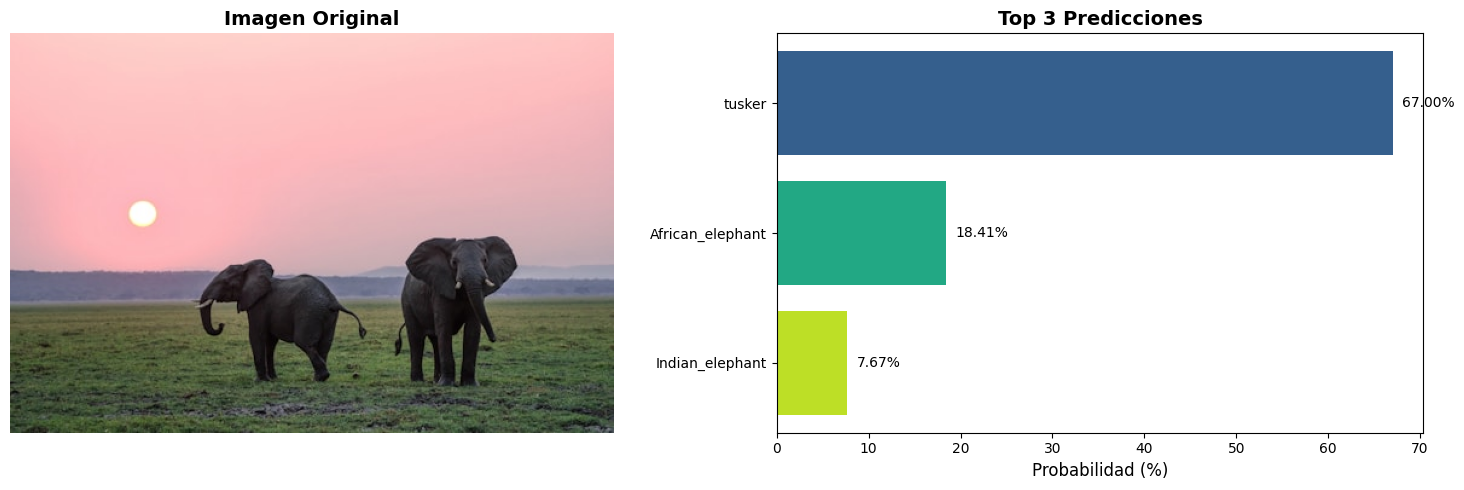


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Tusker: 67.00%
2. African Elephant: 18.41%
3. Indian Elephant: 7.67%


üì∏ Procesando: Autom√≥vil


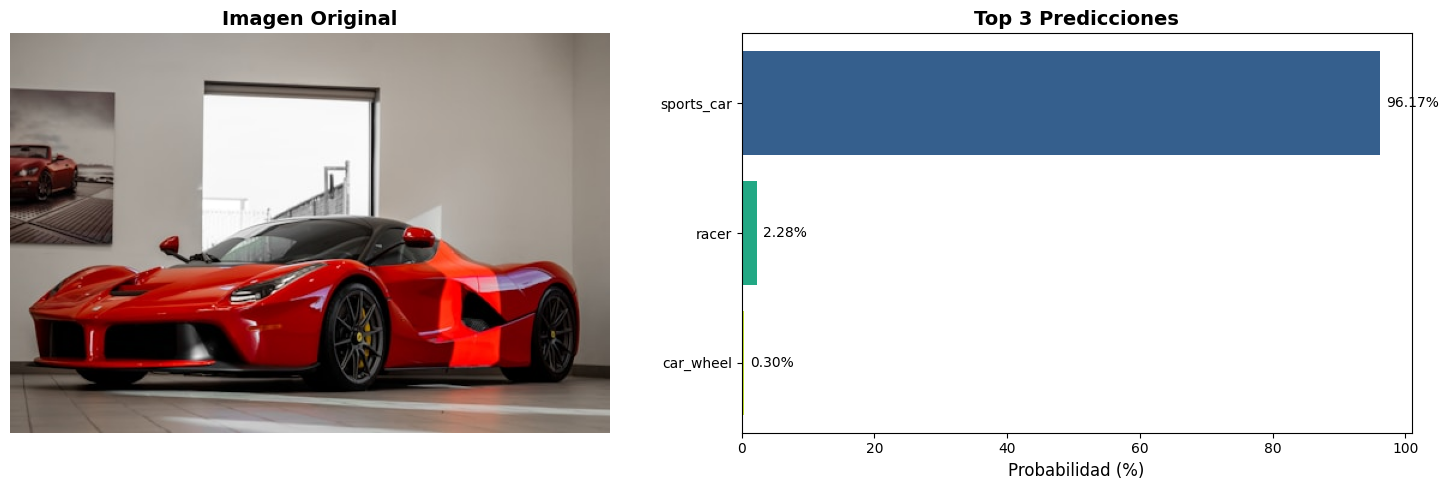


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Sports Car: 96.17%
2. Racer: 2.28%
3. Car Wheel: 0.30%


üì∏ Procesando: Pizza


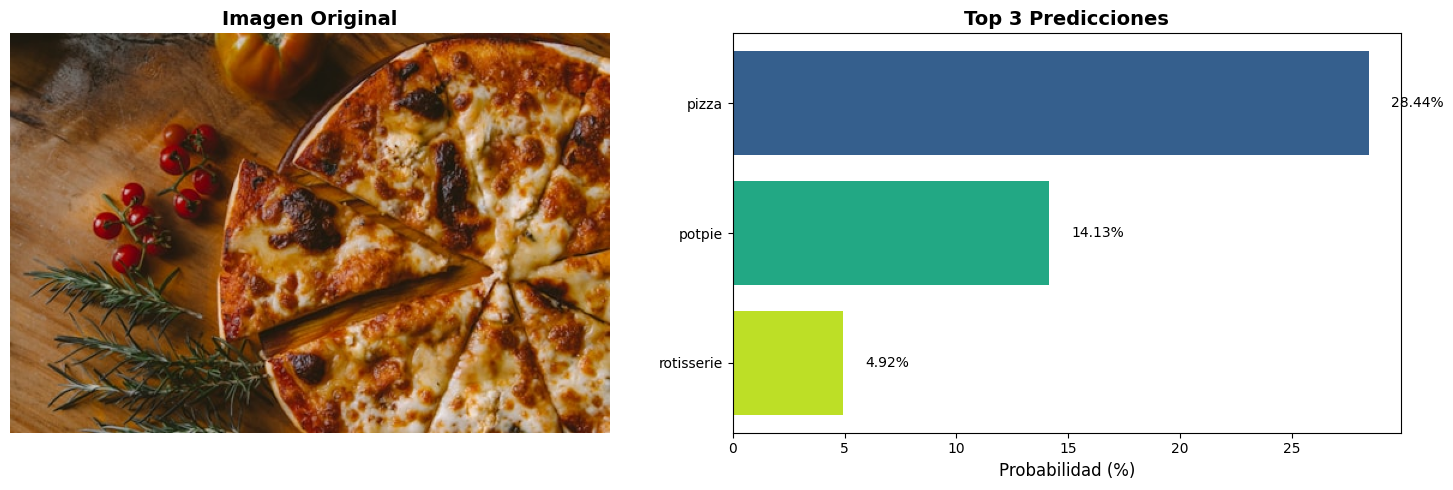


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Pizza: 28.44%
2. Potpie: 14.13%
3. Rotisserie: 4.92%


üì∏ Procesando: Avi√≥n


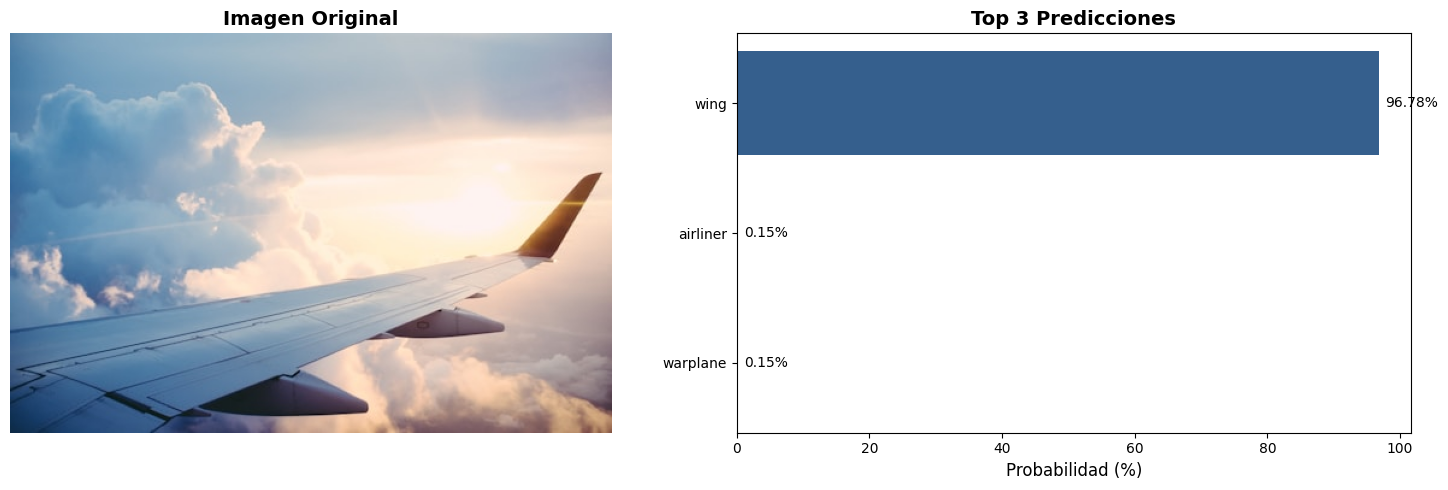


üéØ RESULTADOS DE CLASIFICACI√ìN
1. Wing: 96.78%
2. Airliner: 0.15%
3. Warplane: 0.15%



In [16]:
urls_ejemplo = {
    "Elefante": "https://images.unsplash.com/photo-1564760055775-d63b17a55c44?w=500",
    "Autom√≥vil": "https://images.unsplash.com/photo-1583121274602-3e2820c69888?w=500",
    "Pizza": "https://images.unsplash.com/photo-1513104890138-7c749659a591?w=500",
    "Avi√≥n": "https://images.unsplash.com/photo-1436491865332-7a61a109cc05?w=500"
}

print("üîÑ Clasificando m√∫ltiples im√°genes...\n")

for nombre, url in urls_ejemplo.items():
    print(f"\n{'='*60}")
    print(f"üì∏ Procesando: {nombre}")
    print(f"{'='*60}")

    img = cargar_imagen_desde_url(url)
    if img:
        img_procesada = preprocesar_imagen(img)
        predicciones = model.predict(img_procesada, verbose=0)
        clasificar_y_mostrar(img, predicciones, top_k=3)

## üìä Parte 6: An√°lisis de Confianza

Exploremos c√≥mo el modelo maneja diferentes niveles de confianza.


üîç Analizando confianza de la √∫ltima predicci√≥n...


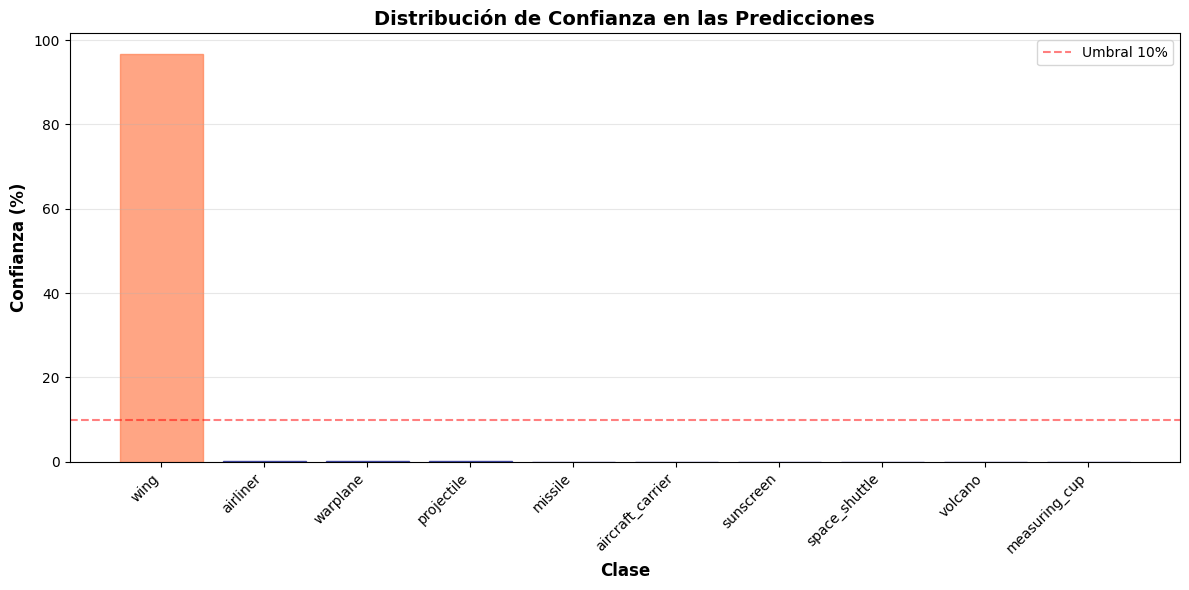


üìà M√©tricas de confianza:
  ‚Ä¢ Confianza m√°xima: 96.78%
  ‚Ä¢ Suma Top-5: 97.24%
  ‚Ä¢ Nivel de certeza: Alto


In [17]:
def analizar_confianza(predicciones):
    """Analiza la distribuci√≥n de confianza en las predicciones"""
    resultados = decode_predictions(predicciones, top=10)[0]

    fig, ax = plt.subplots(figsize=(12, 6))

    clases = [f"{r[1][:20]}" for r in resultados]
    probs = [r[2] * 100 for r in resultados]

    bars = ax.bar(range(len(clases)), probs, color='skyblue', edgecolor='navy', alpha=0.7)
    bars[0].set_color('coral')

    ax.set_xlabel('Clase', fontsize=12, fontweight='bold')
    ax.set_ylabel('Confianza (%)', fontsize=12, fontweight='bold')
    ax.set_title('Distribuci√≥n de Confianza en las Predicciones', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(clases)))
    ax.set_xticklabels(clases, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)

    # L√≠nea de referencia
    ax.axhline(y=10, color='r', linestyle='--', alpha=0.5, label='Umbral 10%')
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Calcular m√©tricas
    max_conf = probs[0]
    suma_top5 = sum(probs[:5])

    print(f"\nüìà M√©tricas de confianza:")
    print(f"  ‚Ä¢ Confianza m√°xima: {max_conf:.2f}%")
    print(f"  ‚Ä¢ Suma Top-5: {suma_top5:.2f}%")
    print(f"  ‚Ä¢ Nivel de certeza: {'Alto' if max_conf > 50 else 'Medio' if max_conf > 20 else 'Bajo'}")

# Analizar √∫ltima predicci√≥n
print("\nüîç Analizando confianza de la √∫ltima predicci√≥n...")
analizar_confianza(predicciones)

## üìö Parte 7: Informaci√≥n Adicional

In [18]:
print("üìã Ejemplo de categor√≠as que puede clasificar MobileNetV2:\n")
categorias_ejemplo = [
    "Animales: golden_retriever, tiger, elephant, zebra",
    "Veh√≠culos: convertible, sports_car, ambulance, airliner",
    "Objetos: laptop, coffee_mug, wine_bottle, basketball",
    "Comida: pizza, ice_cream, hamburger, espresso",
    "Naturaleza: coral_reef, volcano, valley, seashore"
]

for categoria in categorias_ejemplo:
    print(f"  ‚Ä¢ {categoria}")

print("\nüí° Consejo: MobileNetV2 funciona mejor con:")
print("  ‚úì Im√°genes claras y bien iluminadas")
print("  ‚úì Objetos centrados en la imagen")
print("  ‚úì Fondos simples")
print("  ‚úì Categor√≠as incluidas en ImageNet")

üìã Ejemplo de categor√≠as que puede clasificar MobileNetV2:

  ‚Ä¢ Animales: golden_retriever, tiger, elephant, zebra
  ‚Ä¢ Veh√≠culos: convertible, sports_car, ambulance, airliner
  ‚Ä¢ Objetos: laptop, coffee_mug, wine_bottle, basketball
  ‚Ä¢ Comida: pizza, ice_cream, hamburger, espresso
  ‚Ä¢ Naturaleza: coral_reef, volcano, valley, seashore

üí° Consejo: MobileNetV2 funciona mejor con:
  ‚úì Im√°genes claras y bien iluminadas
  ‚úì Objetos centrados en la imagen
  ‚úì Fondos simples
  ‚úì Categor√≠as incluidas en ImageNet


## Probando YOLO

In [19]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.204 üöÄ Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 39.3/107.7 GB disk)


In [20]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://www.lacuarta.com/resizer/v2/HKF726G5JFCABA5QG7YOF3EFWM.jpeg?auth=93f34a892320801c1560141ac6e56f71e09c4c00557eb5eaa4c5118fd0f3196d&smart=true&width=800&height=1262&quality=70'

Ultralytics 8.3.204 üöÄ Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://www.lacuarta.com/resizer/v2/HKF726G5JFCABA5QG7YOF3EFWM.jpeg locally at HKF726G5JFCABA5QG7YOF3EFWM.jpeg
image 1/1 /content/HKF726G5JFCABA5QG7YOF3EFWM.jpeg: 640x416 4 persons, 221.9ms
Speed: 8.3ms preprocess, 221.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/runs/detect/predict2
üí° Learn more at https://docs.ultralytics.com/modes/predict


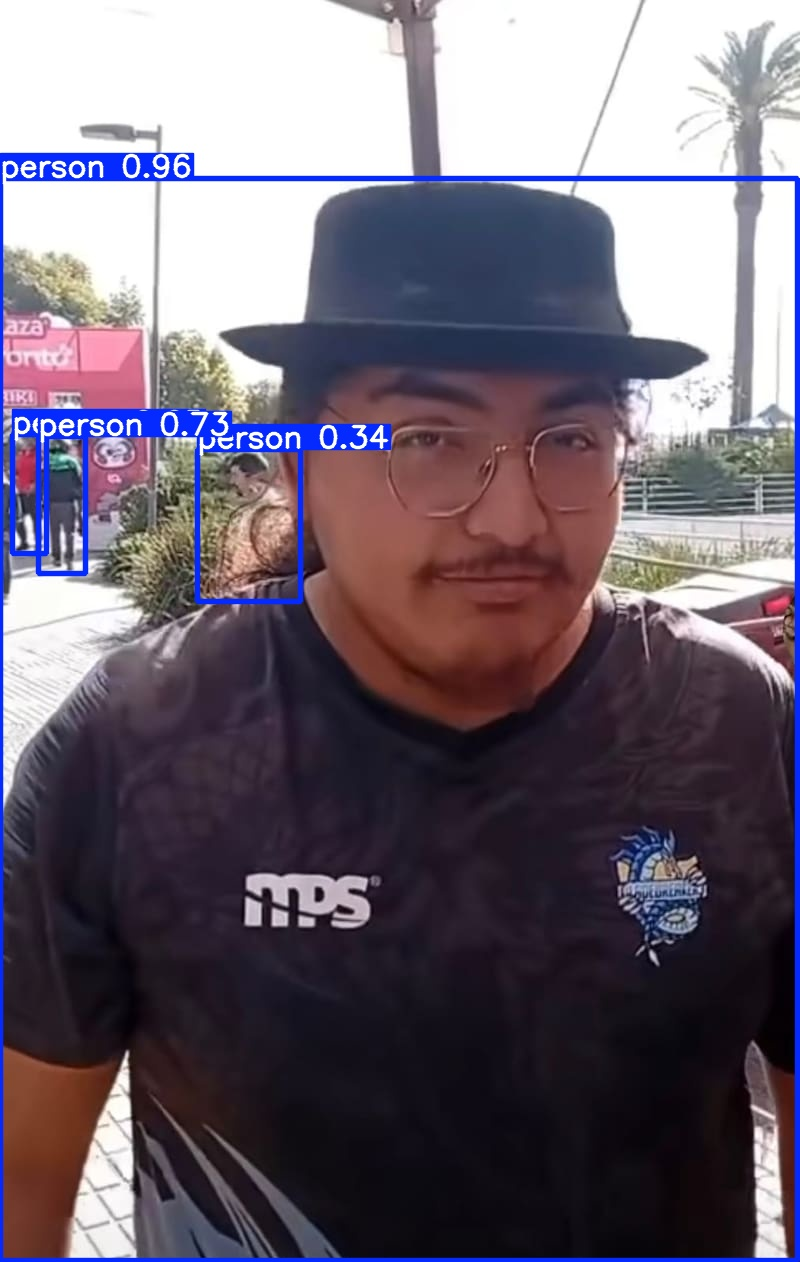

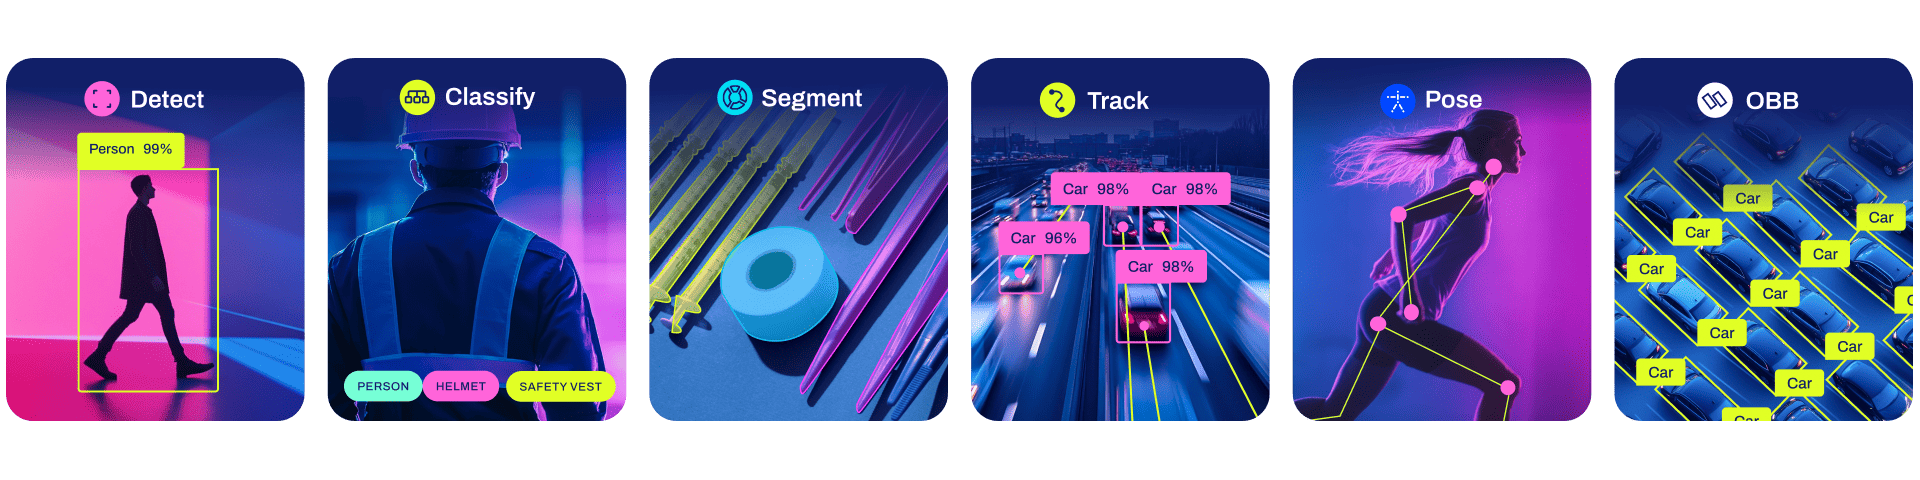